In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter

In [2]:
gpt4 = np.load('/Volumes/HomeX/Users/yitjunyam_1/Documents/School/UVA/Master_AI/Deep_Learning_2/motif_group24_snellius/robodesk_data/preference/preferences_gpt4.npy')
gpt4_general = np.load('/Volumes/HomeX/Users/yitjunyam_1/Documents/School/UVA/Master_AI/Deep_Learning_2/motif_group24_snellius/robodesk_data/preference/preferences_gpt4general.npy')
llava = np.load('/Volumes/HomeX/Users/yitjunyam_1/Documents/School/UVA/Master_AI/Deep_Learning_2/motif_group24_snellius/robodesk_data/preference/preferences_llava.npy')


In [15]:
gpt4_count = [count for _, count in sorted(Counter(gpt4).items())]
gpt4_general_count = [count for _, count in sorted(Counter(gpt4_general).items())]
llava_count = [count for _, count in sorted(Counter(llava).items())]
gpt4_count.insert(2, 0)
llava_count.insert(2, 0)

gpt4_count = np.array(gpt4_count)
gpt4_general_count = np.array(gpt4_general_count)
llava_count = np.array(llava_count)

gpt4_percent = gpt4_count / gpt4_count.sum() * 100
gpt4_general_percent = gpt4_general_count / gpt4_general_count.sum() * 100
llava_percent = llava_count / llava_count.sum() * 100

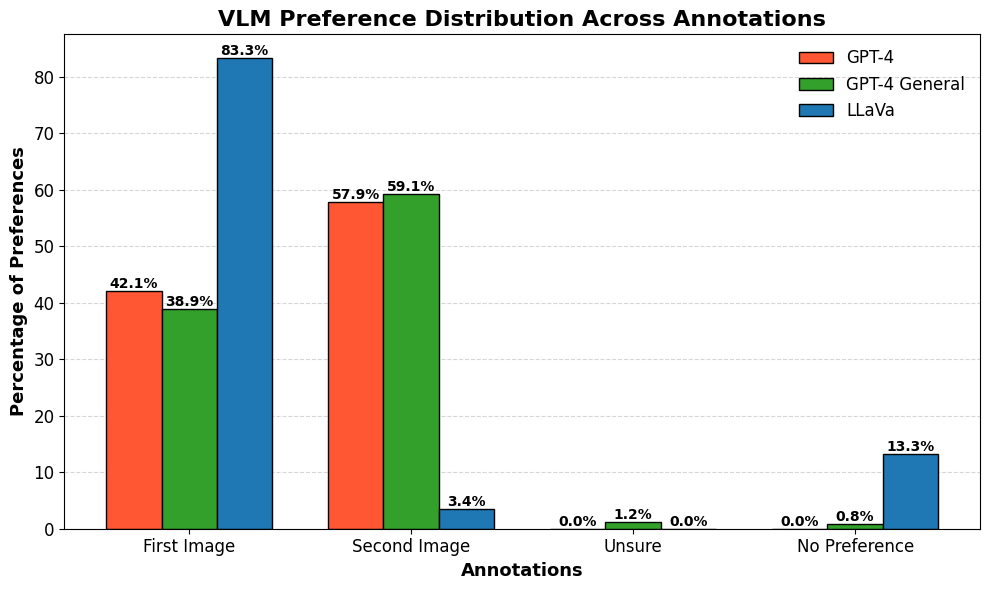

In [18]:
barWidth = 0.25
fig, ax = plt.subplots(figsize=(10, 6))

# Bar positions
br1 = np.arange(len(llava_percent))
br2 = br1 + barWidth
br3 = br2 + barWidth

# Bar plots
bars1 = ax.bar(br1, gpt4_percent, color='#FF5733', width=barWidth, edgecolor='black', label='GPT-4')
bars2 = ax.bar(br2, gpt4_general_percent, color='#33A02C', width=barWidth, edgecolor='black', label='GPT-4 General')
bars3 = ax.bar(br3, llava_percent, color='#1F78B4', width=barWidth, edgecolor='black', label='LLaVa')

# Add percentage labels on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,  # small offset above the bar
            f'{height:.1f}%',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Labels and title
ax.set_xlabel('Annotations', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Preferences', fontsize=13, fontweight='bold')
ax.set_title('VLM Preference Distribution Across Annotations', fontsize=16, fontweight='bold')

# Custom ticks
ax.set_xticks([r + barWidth for r in range(len(llava_count))])
ax.set_xticklabels(['First Image', 'Second Image', 'Unsure', 'No Preference'], fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Grid and layout
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Legend
ax.legend(fontsize=12, frameon=False)

# Tight layout
plt.tight_layout()

plt.savefig("vlm_preference_distribution.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()